In [1372]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [1373]:
# def plot_graph(G1):
#     fig, ax = plt.subplots()
#     for n in G1.nodes:
#         ax.plot(n[0],n[1],'bo', markersize=4)
#     for e in G1.edges:
#         ax.plot([e[0][0],e[1][0]],[e[0][1],e[1][1]], 'g')

In [1398]:
# (node, danger_power)
# 0-safe; 9-danger
default_safe_value=0
#1

# G = nx.grid_graph(dim=[25, 25])  # nodes are two-tuples (x,y)

# danger_points=[((14,13),9),((10,12),9),((0,15),7),((6,6),8),((3,10),7),((24,22),6), ((3,5),7), ((5,23),9),((23,10),7),((8,0),9),((17,2),9),((8,19),5),((8,18),9),((9,23),9),((6,2),9),((5,24),9),((20,20),8)]

# origin_point_x= 23
# origin_point_y= 1
# destination_point_x=1
# destination_point_y= 23

#2

# G = nx.grid_graph(dim=[40, 20])  # nodes are two-tuples (x,y)

# danger_points=[((5,7),9),((3,7),8),((7,7),8),((16,23),8),((18,23),8),((14,23),5),((12,23),9),((10,23),9),((14,20),7),((14,26),7),((2,37),6),((2,39),5),((4,36),9)]

# origin_point_x= 1
# origin_point_y= 1
# destination_point_x=18
# destination_point_y= 38


#3

G = nx.grid_graph(dim=[30, 50])  # nodes are two-tuples (x,y)


danger_points=[((5,10),9),((3,10),8),((7,10),8),((7,10),9),((8,9),8),((5,0),8),((16,23),8),((18,23),8),((14,23),5),((12,23),9),((10,23),9),((14,20),7),((14,26),7), ((20,10),6),((26,9),9),((24,14),9),((24,10),8),((24,18),8),((24,16),9),((43,14),9),((40,15),9),((45,15),8),((37,15),8),((28,15),9),((48,15),8)]


origin_point_x= 3
origin_point_y= 7
destination_point_x= 45
destination_point_y= 28


origin_node= (origin_point_x,origin_point_y)
destination_node=(destination_point_x,destination_point_y)

# plot_graph(G)

In [1399]:
def dist_euclidean(a, b):
    (x1,y1)=a
    (x2,y2)=b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    # return 0

In [1400]:
def gauss_filter(x,y,p1,p2, sigma):
    # return np.exp(-((p1-x)*(p1-x)+((p2-y)*(p2-y)))/(2*sigma*sigma))/(2*np.pi*(sigma*sigma))
    return np.exp(-((p1-x)*(p1-x)+((p2-y)*(p2-y)))/(2*sigma*sigma))

In [1401]:
def get_nodes_attributes (G1, danger_points1,name_attr1:str,sigma_local=0.1, sigma_wide=3, k_local=1,k_wide=1,default_value=0,improving_attr=True):
    attr_dict={n:{name_attr1:default_value} for n in G1.nodes}
    # print(attr_dict.values())
    L=list(attr_dict.values())
    for n in G1.nodes:
        for i in range(len(danger_points1)):
            (d_point,d_value)=danger_points1[i]
            # dist= dist_euclidean(d_point,n)
            # attr_dict[n]["interestingness_attr"]=attr_dict[n]["interestingness_attr"]+interestingness_func(feature)/(0.01*dist)
            addition_value=d_value*(gauss_filter(n[0],n[1],d_point[0],d_point[1],sigma_local)*k_local+gauss_filter(n[0],n[1],d_point[0],d_point[1],sigma_wide)*k_wide)
            if improving_attr:
                attr_dict[n][name_attr1]=attr_dict[n][name_attr1]-addition_value
            else:
                attr_dict[n][name_attr1]=attr_dict[n][name_attr1]+addition_value
    if improving_attr:
        min_attr_dict= min([L[i][name_attr1] for i in range(len(L))])
    # print(min_attr_dict)
    if improving_attr:
        for n in G1.nodes:
            attr_dict[n][name_attr1]=attr_dict[n][name_attr1]+abs(min_attr_dict)
    return attr_dict

In [1402]:
danger_attr=get_nodes_attributes(G,danger_points,"danger_attr",default_value=default_safe_value,improving_attr=False)
nx.set_node_attributes(G,danger_attr)
[G.nodes[n]["danger_attr"] for n in G.nodes]

[2.029110238013333,
 1.9847916439377766,
 1.8469769817045454,
 1.7807264365115405,
 1.9886939964395325,
 2.639490429388231,
 3.7853702283468396,
 5.296025806185549,
 6.850254594244984,
 8.020607316176388,
 8.437690074318608,
 7.955325392582382,
 6.71642237321798,
 5.076192671437766,
 3.4342532702397652,
 2.080179691936685,
 1.1291849097826927,
 0.5516205334255877,
 0.24673161212970984,
 0.10784848191040501,
 0.055171654485448564,
 0.0404780241800453,
 0.038795341905201716,
 0.03876103988586289,
 0.03617496111283561,
 0.03054385961500517,
 0.023148141102698513,
 0.015718822961248075,
 0.009561720423017105,
 0.005211436605619024,
 3.3427027101976066,
 3.264010042416866,
 3.0225068363758214,
 2.88144898097711,
 3.1622749871447144,
 4.129884036345184,
 5.8645446682371976,
 8.16221404576986,
 10.525798232764808,
 12.298517259971891,
 12.9167480462029,
 12.161203424862082,
 10.254621331064763,
 7.741907378877743,
 5.233003011180229,
 3.168115931860102,
 1.721172383778487,
 0.8459087751733283

In [1403]:
def get_edges_attributes(G1,name_attr1,k_length=0.5,k_attr=0.5):
    attr_dict={edge:{name_attr1:0} for edge in G1.edges}
    for edge in G1.edges:
        # IF DIGRAF
        # attr_dict[edge][name_attr1]=G1.nodes[edge[1]]["danger_attr"]*k_attr+k_length*G1.edges[edge]["length"]
        # IF NOT DIRECTED GRAF:
        max_val=max(G1.nodes[edge[1]]["danger_attr"],G1.nodes[edge[0]]["danger_attr"])
        attr_dict[edge][name_attr1]=max_val*k_attr+k_length*G1.edges[edge]["length"]
    return attr_dict
    

In [1404]:
nx.set_edge_attributes(G,{edge:{"length":1} for edge in G.edges})
danger_attr_edge=get_edges_attributes(G,"danger_attr_edge")
nx.set_edge_attributes(G,danger_attr_edge)
# [G.edges[e]["danger_attr_edge"] for e in G.edges]

In [1405]:
# path_orig_dest=nx.algorithms.shortest_paths.astar_path(G,origin_node,destination_node, weight="",heuristic=dist_euclidean)
path_orig_dest_nodes=nx.algorithms.shortest_paths.astar_path(G,origin_node,destination_node,heuristic=dist_euclidean,weight="danger_attr_edge")
# path_orig_dest_nodes

In [1406]:
path_orig_dest_edges=[(path_orig_dest_nodes[i],path_orig_dest_nodes[i+1])for i in range(len(path_orig_dest_nodes)-1)]
# path_orig_dest_edges

C:\Users\Dell\AppData\Local\Temp\ipykernel_7760\2448574485.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


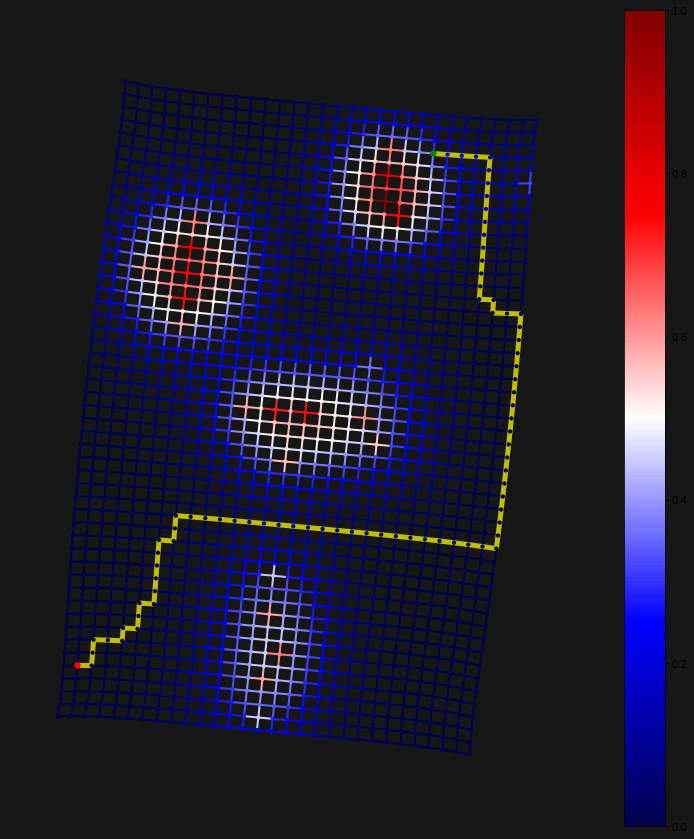

In [1408]:
from matplotlib.pyplot import figure

# figure(figsize=(15, 15), dpi=80)
fig, ax = plt.subplots()
fig.set_size_inches(13,15)
# fig.set_dpi(100)

pos = nx.kamada_kawai_layout(G)
colormap=plt.cm.seismic
# nx.draw(G, pos=pos, node_color="red",node_size=4,edge_cmap=plt.cm.seismic, width=list(nx.get_edge_attributes(G,'danger_attr_edge').values()))
nx.draw(G, pos=pos, cmap=colormap,node_color=list(nx.get_node_attributes(G,'danger_attr').values()),node_size=10,
        edge_cmap=colormap, edge_color=list(nx.get_edge_attributes(G,'danger_attr_edge').values()),width=2)
sm = plt.cm.ScalarMappable(cmap=colormap)
sm._A = []
plt.colorbar(sm)
fig.set_facecolor('#161616')
nx.draw_networkx_nodes(G,pos=pos,nodelist=[origin_node,destination_node],node_color=["g","r"],node_size=30)
nx.draw_networkx_edges(G,pos=pos,edgelist=path_orig_dest_edges,edge_color = "y",width=5)
